In [2]:
import pandas as pd

# Load the CSV file
file_path = 'Tweets.csv'  # Update the path if necessary
tweets_df = pd.read_csv(file_path)

# Inspect the data
print(tweets_df.head())


   id                                               link  \
0   0  https://twitter.com/HackneyPSC/status/17274436...   
1   1  https://twitter.com/cherrysattitude/status/172...   
2   2  https://twitter.com/diamoundgirls2/status/1710...   
3   3  https://twitter.com/mmtchi/status/172764634165...   
4   4  https://twitter.com/NoahIeeNG/status/172744319...   

                                                text  \
0  A statement from psychoanalytic activists:  Th...   
1                        bak bak bak bak doyamadınız   
2  Check out 🏒 35 + different ERIK KARLSSON cards...   
3  Il s'en passe des trucs pendant qu'on vous ori...   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...   

                          date  likes  comments  
0   Nov 22, 2023 · 9:47 PM UTC      0         0  
1   Nov 22, 2023 · 3:27 PM UTC    443         9  
2    Oct 7, 2023 · 7:15 AM UTC      0         0  
3  Nov 23, 2023 · 11:12 AM UTC    381        44  
4   Nov 22, 2023 · 9:45 PM UTC      0         0  


In [4]:
import pandas as pd
import re

# Load the CSV file
file_path = 'Tweets.csv'  # Update the path if necessary
tweets_df = pd.read_csv(file_path)

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove special characters
        text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
    else:
        text = ''  # Handle non-string inputs (e.g., NaNs)
    return text

# Apply preprocessing
tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)

# Inspect the cleaned text
print(tweets_df[['text', 'cleaned_text']].head())


                                                text  \
0  A statement from psychoanalytic activists:  Th...   
1                        bak bak bak bak doyamadınız   
2  Check out 🏒 35 + different ERIK KARLSSON cards...   
3  Il s'en passe des trucs pendant qu'on vous ori...   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...   

                                        cleaned_text  
0  A statement from psychoanalytic activists The ...  
1                          bak bak bak bak doyamadnz  
2  Check out 35 different ERIK KARLSSON cards lot...  
3  Il sen passe des trucs pendant quon vous orien...  
4  AW OKAY WELL THATS COOL IM SURE PAL WILL APPRE...  


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis
tweets_df['sentiment'] = tweets_df['cleaned_text'].apply(get_sentiment_scores)

# Expand sentiment scores into separate columns
tweets_df = pd.concat([tweets_df.drop(['sentiment'], axis=1), tweets_df['sentiment'].apply(pd.Series)], axis=1)

# Inspect the results
print(tweets_df.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   id                                               link  \
0   0  https://twitter.com/HackneyPSC/status/17274436...   
1   1  https://twitter.com/cherrysattitude/status/172...   
2   2  https://twitter.com/diamoundgirls2/status/1710...   
3   3  https://twitter.com/mmtchi/status/172764634165...   
4   4  https://twitter.com/NoahIeeNG/status/172744319...   

                                                text  \
0  A statement from psychoanalytic activists:  Th...   
1                        bak bak bak bak doyamadınız   
2  Check out 🏒 35 + different ERIK KARLSSON cards...   
3  Il s'en passe des trucs pendant qu'on vous ori...   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...   

                          date  likes  comments  \
0   Nov 22, 2023 · 9:47 PM UTC      0         0   
1   Nov 22, 2023 · 3:27 PM UTC    443         9   
2    Oct 7, 2023 · 7:15 AM UTC      0         0   
3  Nov 23, 2023 · 11:12 AM UTC    381        44   
4   Nov 22, 2023 · 9:45 PM UTC      0         0

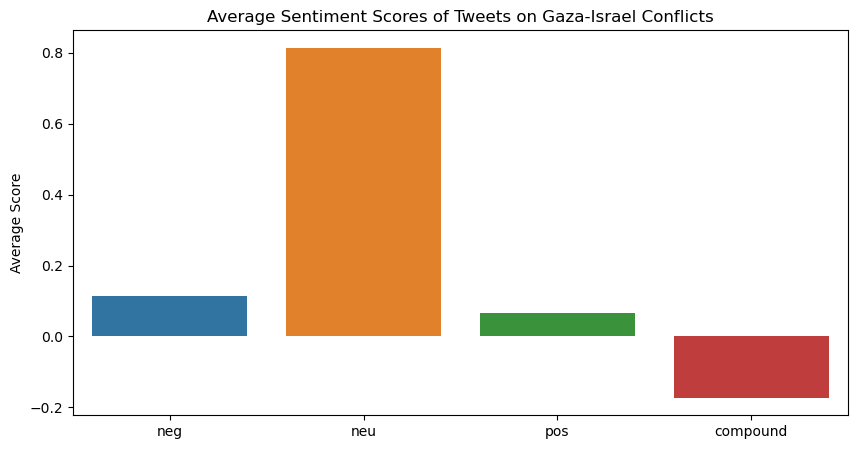

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average sentiment scores
average_sentiment = tweets_df[['neg', 'neu', 'pos', 'compound']].mean()

# Plot the average sentiment scores
plt.figure(figsize=(10, 5))
sns.barplot(x=average_sentiment.index, y=average_sentiment.values)
plt.title('Average Sentiment Scores of Tweets on Gaza-Israel Conflicts')
plt.ylabel('Average Score')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_1584\3173155362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')


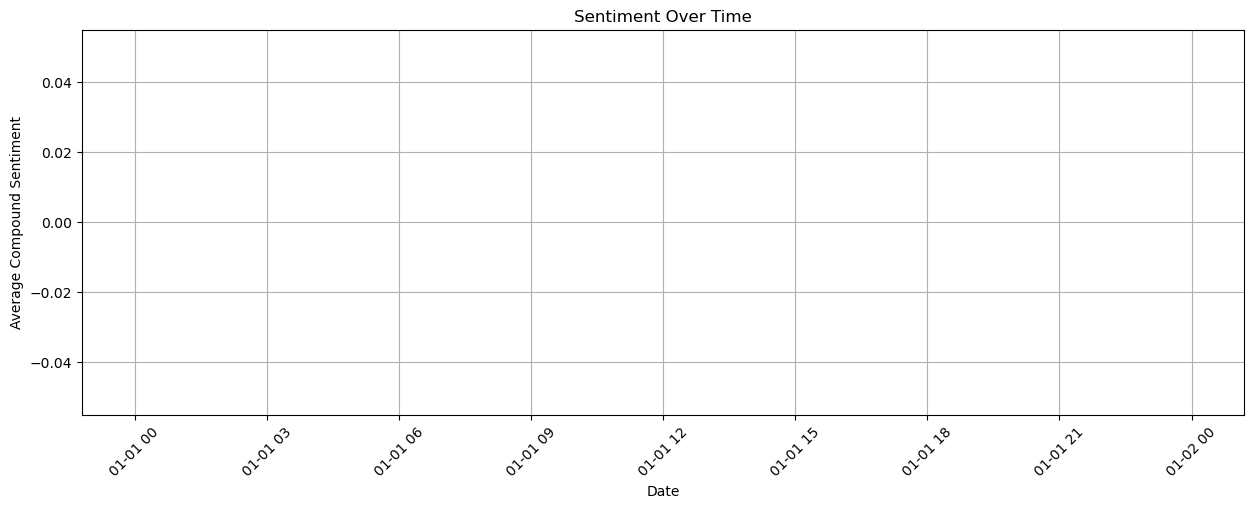

In [7]:
# Convert the date column to datetime
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

# Group by date and calculate average compound score
sentiment_over_time = tweets_df.groupby(tweets_df['date'].dt.date)['compound'].mean()

# Plot sentiment over time
plt.figure(figsize=(15, 5))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   id                                               link  \
0   0  https://twitter.com/HackneyPSC/status/17274436...   
1   1  https://twitter.com/cherrysattitude/status/172...   
2   2  https://twitter.com/diamoundgirls2/status/1710...   
3   3  https://twitter.com/mmtchi/status/172764634165...   
4   4  https://twitter.com/NoahIeeNG/status/172744319...   

                                                text date  likes  comments  \
0  A statement from psychoanalytic activists:  Th...  NaT      0         0   
1                        bak bak bak bak doyamadınız  NaT    443         9   
2  Check out 🏒 35 + different ERIK KARLSSON cards...  NaT      0         0   
3  Il s'en passe des trucs pendant qu'on vous ori...  NaT    381        44   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...  NaT      0         0   

                                        cleaned_text  neg    neu    pos  \
0  A statement from psychoanalytic activists The ...  0.0  1.000  0.000   
1                   

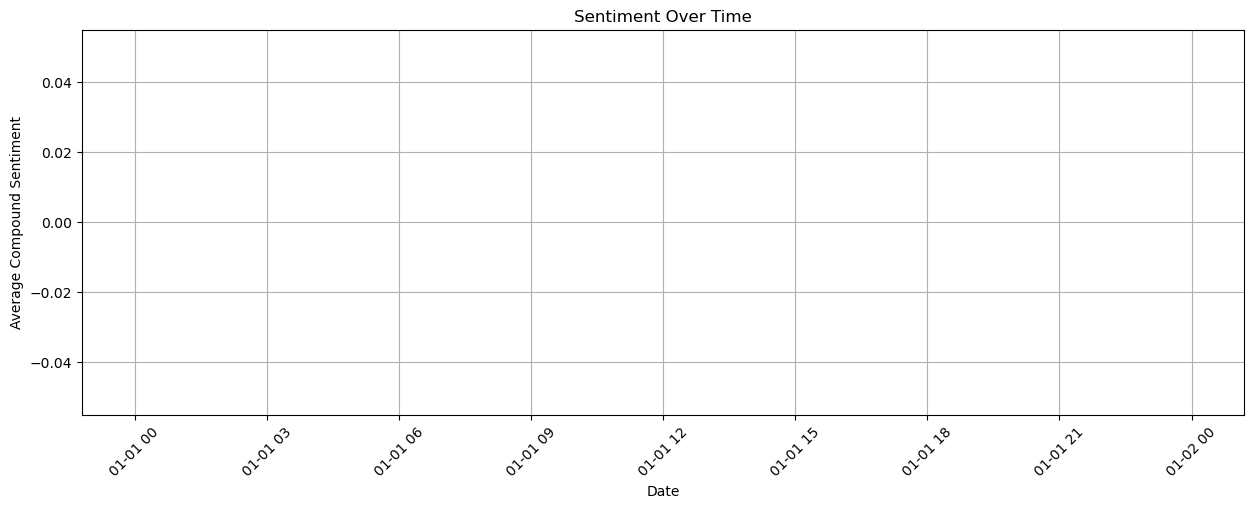

In [8]:
import pandas as pd
import re
from datetime import datetime

# Load the CSV file
file_path = 'Tweets.csv'  # Update the path if necessary
tweets_df = pd.read_csv(file_path)

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove special characters
        text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
    else:
        text = ''  # Handle non-string inputs (e.g., NaNs)
    return text

# Apply preprocessing
tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)

# Convert the date column to datetime
tweets_df['date'] = tweets_df['date'].apply(lambda x: re.sub(r' Â·.*', '', x))  # Remove everything after the date part
tweets_df['date'] = pd.to_datetime(tweets_df['date'], format='%b %d, %Y', errors='coerce')

# Function to get sentiment scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis
tweets_df['sentiment'] = tweets_df['cleaned_text'].apply(get_sentiment_scores)

# Expand sentiment scores into separate columns
tweets_df = pd.concat([tweets_df.drop(['sentiment'], axis=1), tweets_df['sentiment'].apply(pd.Series)], axis=1)

# Inspect the results
print(tweets_df.head())

# Group by date and calculate average compound score
sentiment_over_time = tweets_df.groupby(tweets_df['date'].dt.date)['compound'].mean()

# Plot sentiment over time
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

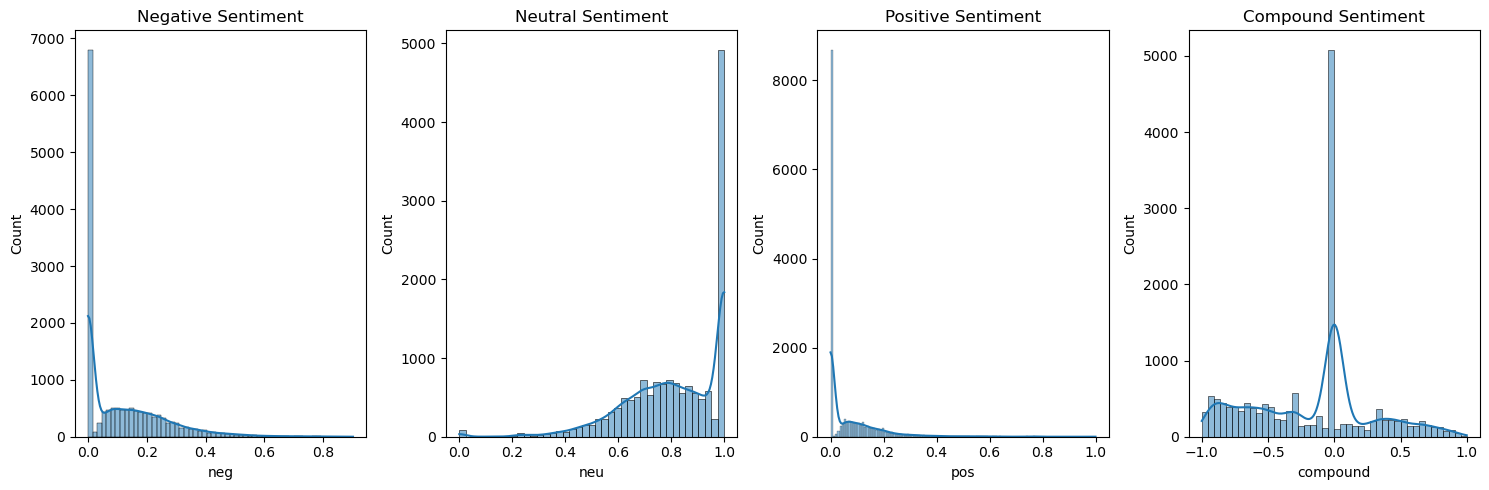

In [9]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(15, 5))

# Subplot for negative sentiment
plt.subplot(1, 4, 1)
sns.histplot(tweets_df['neg'], kde=True)
plt.title('Negative Sentiment')

# Subplot for neutral sentiment
plt.subplot(1, 4, 2)
sns.histplot(tweets_df['neu'], kde=True)
plt.title('Neutral Sentiment')

# Subplot for positive sentiment
plt.subplot(1, 4, 3)
sns.histplot(tweets_df['pos'], kde=True)
plt.title('Positive Sentiment')

# Subplot for compound sentiment
plt.subplot(1, 4, 4)
sns.histplot(tweets_df['compound'], kde=True)
plt.title('Compound Sentiment')

plt.tight_layout()
plt.show()


In [10]:
# Top 5 positive tweets
top_positive_tweets = tweets_df.sort_values(by='compound', ascending=False).head(5)
print("Top 5 Positive Tweets:")
print(top_positive_tweets[['cleaned_text', 'compound']])

# Top 5 negative tweets
top_negative_tweets = tweets_df.sort_values(by='compound', ascending=True).head(5)
print("\nTop 5 Negative Tweets:")
print(top_negative_tweets[['cleaned_text', 'compound']])


Top 5 Positive Tweets:
                                           cleaned_text  compound
4972  Itay Perry is an IDF soldier who died fighting...    0.9995
9730  The nytimes published a story today with the h...    0.9990
1484  i hope that all of my selfshipper friends know...    0.9794
347   DAY TWO IN ISRAEL I interviewed a Muslim IDF s...    0.9739
566   Feel free to criticize Israel but its crucial ...    0.9728

Top 5 Negative Tweets:
                                            cleaned_text  compound
128    PreWorld War I neither Arabs nor Jews had thei...   -0.9994
15442  Retsef You ask HamasIran initiated barbaric te...   -0.9992
5207   They Kill While Our Government Tweets and Dele...   -0.9989
3409   Dear Piers piersmorgan Lets put aside ideologi...   -0.9989
12472  In the complex and deeply entrenched conflict ...   -0.9987


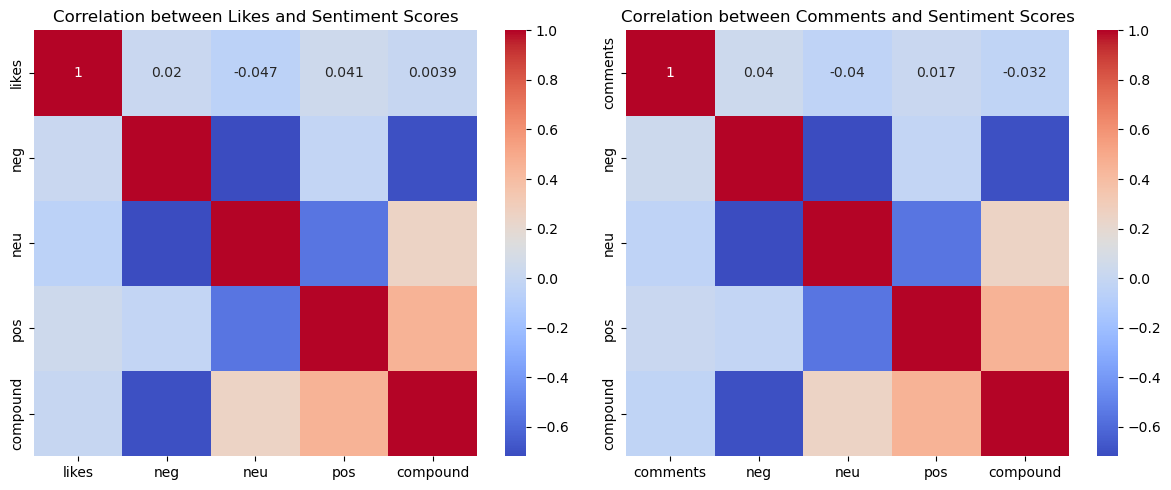

In [11]:
# Calculate correlations
correlation_likes = tweets_df[['likes', 'neg', 'neu', 'pos', 'compound']].corr()
correlation_comments = tweets_df[['comments', 'neg', 'neu', 'pos', 'compound']].corr()

# Plot heatmaps
plt.figure(figsize=(12, 5))

# Correlation with likes
plt.subplot(1, 2, 1)
sns.heatmap(correlation_likes, annot=True, cmap='coolwarm')
plt.title('Correlation between Likes and Sentiment Scores')

# Correlation with comments
plt.subplot(1, 2, 2)
sns.heatmap(correlation_comments, annot=True, cmap='coolwarm')
plt.title('Correlation between Comments and Sentiment Scores')

plt.tight_layout()
plt.show()


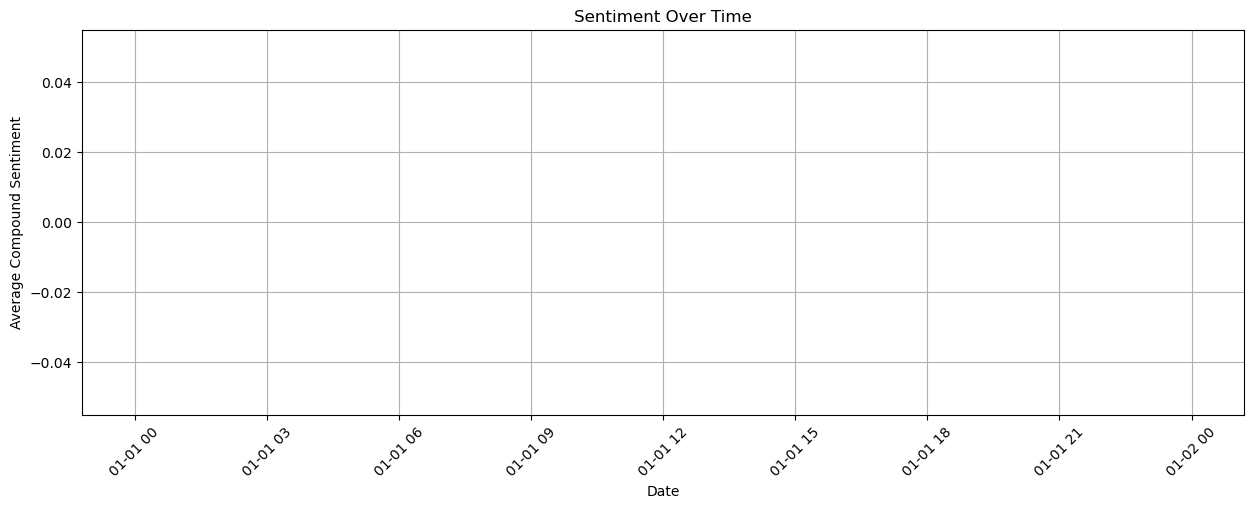

In [12]:
# Convert the date column to datetime
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

# Group by date and calculate average compound score
sentiment_over_time = tweets_df.groupby(tweets_df['date'].dt.date)['compound'].mean()

# Plot sentiment over time
plt.figure(figsize=(15, 5))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   id                                               link  \
0   0  https://twitter.com/HackneyPSC/status/17274436...   
1   1  https://twitter.com/cherrysattitude/status/172...   
2   2  https://twitter.com/diamoundgirls2/status/1710...   
3   3  https://twitter.com/mmtchi/status/172764634165...   
4   4  https://twitter.com/NoahIeeNG/status/172744319...   

                                                text date  likes  comments  \
0  A statement from psychoanalytic activists:  Th...  NaT      0         0   
1                        bak bak bak bak doyamadınız  NaT    443         9   
2  Check out 🏒 35 + different ERIK KARLSSON cards...  NaT      0         0   
3  Il s'en passe des trucs pendant qu'on vous ori...  NaT    381        44   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...  NaT      0         0   

                                        cleaned_text  neg    neu    pos  \
0  A statement from psychoanalytic activists The ...  0.0  1.000  0.000   
1                   

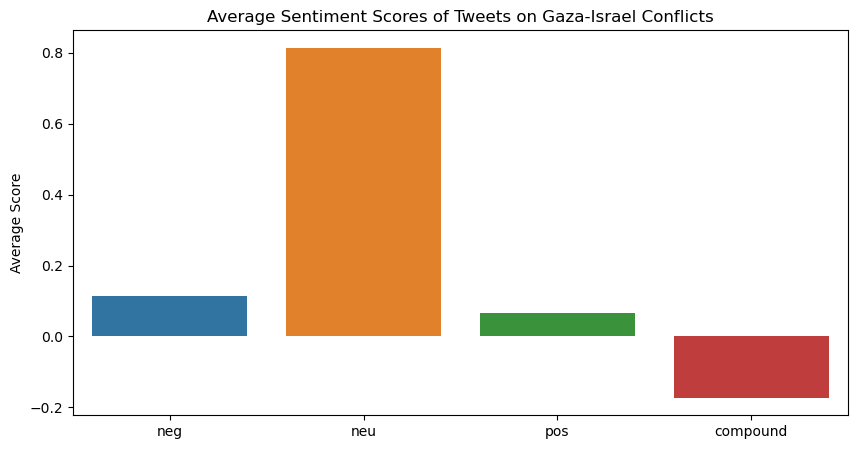

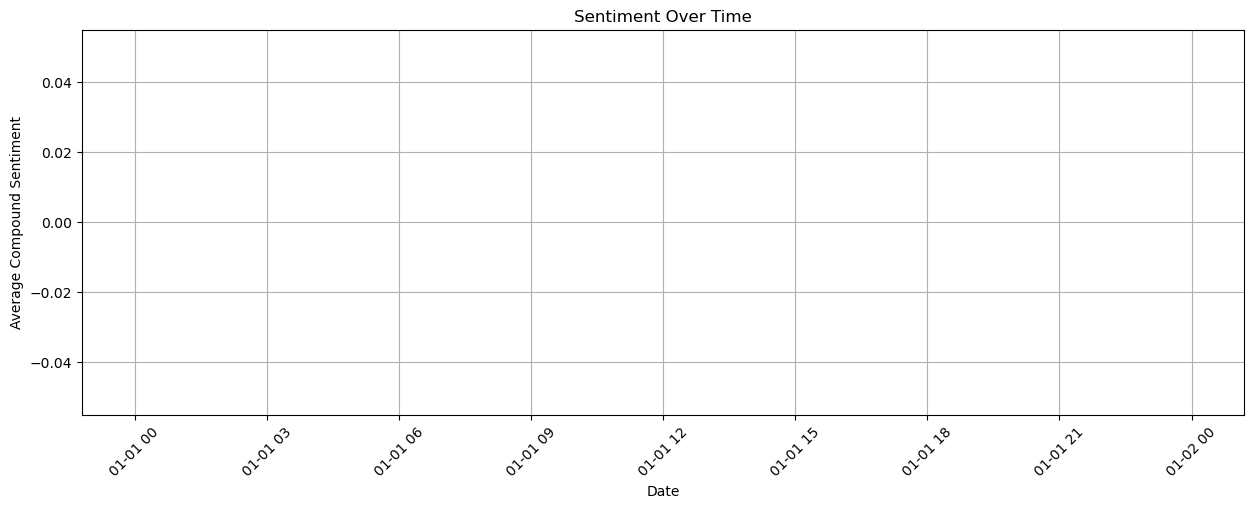

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

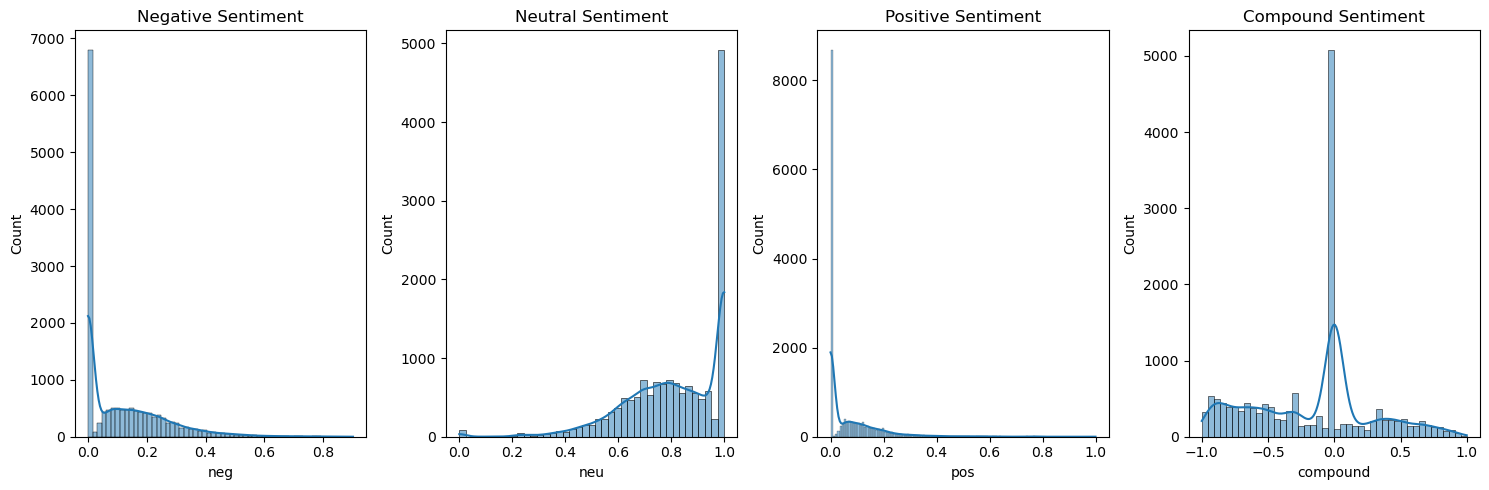

Top 5 Positive Tweets:
                                           cleaned_text  compound
4972  Itay Perry is an IDF soldier who died fighting...    0.9995
9730  The nytimes published a story today with the h...    0.9990
1484  i hope that all of my selfshipper friends know...    0.9794
347   DAY TWO IN ISRAEL I interviewed a Muslim IDF s...    0.9739
566   Feel free to criticize Israel but its crucial ...    0.9728

Top 5 Negative Tweets:
                                            cleaned_text  compound
128    PreWorld War I neither Arabs nor Jews had thei...   -0.9994
15442  Retsef You ask HamasIran initiated barbaric te...   -0.9992
5207   They Kill While Our Government Tweets and Dele...   -0.9989
3409   Dear Piers piersmorgan Lets put aside ideologi...   -0.9989
12472  In the complex and deeply entrenched conflict ...   -0.9987


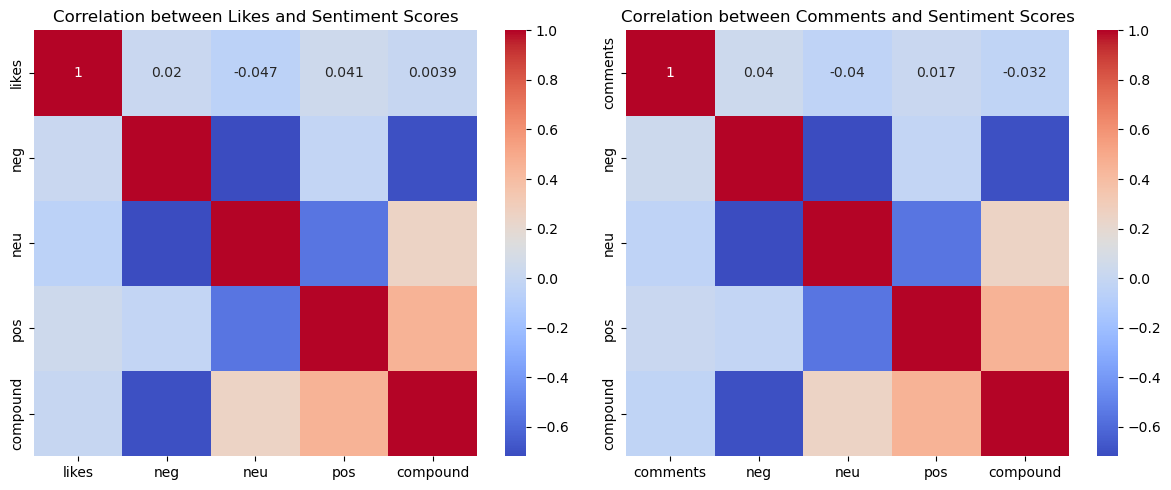

In [1]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Load the CSV file
file_path = 'Tweets.csv'  # Update the path if necessary
tweets_df = pd.read_csv(file_path)

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove special characters
        text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
    else:
        text = ''  # Handle non-string inputs (e.g., NaNs)
    return text

# Apply preprocessing
tweets_df['cleaned_text'] = tweets_df['text'].apply(preprocess_text)

# Convert the date column to datetime
tweets_df['date'] = tweets_df['date'].apply(lambda x: re.sub(r' Â·.*', '', x))  # Remove everything after the date part
tweets_df['date'] = pd.to_datetime(tweets_df['date'], format='%b %d, %Y', errors='coerce')

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis
tweets_df['sentiment'] = tweets_df['cleaned_text'].apply(get_sentiment_scores)

# Expand sentiment scores into separate columns
tweets_df = pd.concat([tweets_df.drop(['sentiment'], axis=1), tweets_df['sentiment'].apply(pd.Series)], axis=1)

# Inspect the results
print(tweets_df.head())

# Calculate and plot average sentiment scores
average_sentiment = tweets_df[['neg', 'neu', 'pos', 'compound']].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=average_sentiment.index, y=average_sentiment.values)
plt.title('Average Sentiment Scores of Tweets on Gaza-Israel Conflicts')
plt.ylabel('Average Score')
plt.show()

# Group by date and calculate average compound score
sentiment_over_time = tweets_df.groupby(tweets_df['date'].dt.date)['compound'].mean()
plt.figure(figsize=(15, 5))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the distribution of sentiment scores
plt.figure(figsize=(15, 5))

# Subplot for negative sentiment
plt.subplot(1, 4, 1)
sns.histplot(tweets_df['neg'], kde=True)
plt.title('Negative Sentiment')

# Subplot for neutral sentiment
plt.subplot(1, 4, 2)
sns.histplot(tweets_df['neu'], kde=True)
plt.title('Neutral Sentiment')

# Subplot for positive sentiment
plt.subplot(1, 4, 3)
sns.histplot(tweets_df['pos'], kde=True)
plt.title('Positive Sentiment')

# Subplot for compound sentiment
plt.subplot(1, 4, 4)
sns.histplot(tweets_df['compound'], kde=True)
plt.title('Compound Sentiment')

plt.tight_layout()
plt.show()

# Top 5 positive tweets
top_positive_tweets = tweets_df.sort_values(by='compound', ascending=False).head(5)
print("Top 5 Positive Tweets:")
print(top_positive_tweets[['cleaned_text', 'compound']])

# Top 5 negative tweets
top_negative_tweets = tweets_df.sort_values(by='compound', ascending=True).head(5)
print("\nTop 5 Negative Tweets:")
print(top_negative_tweets[['cleaned_text', 'compound']])

# Calculate correlations
correlation_likes = tweets_df[['likes', 'neg', 'neu', 'pos', 'compound']].corr()
correlation_comments = tweets_df[['comments', 'neg', 'neu', 'pos', 'compound']].corr()

# Plot heatmaps
plt.figure(figsize=(12, 5))

# Correlation with likes
plt.subplot(1, 2, 1)
sns.heatmap(correlation_likes, annot=True, cmap='coolwarm')
plt.title('Correlation between Likes and Sentiment Scores')

# Correlation with comments
plt.subplot(1, 2, 2)
sns.heatmap(correlation_comments, annot=True, cmap='coolwarm')
plt.title('Correlation between Comments and Sentiment Scores')

plt.tight_layout()
plt.show()


In [14]:
import tweepy

# Replace with your own credentials
api_key = "XiNi3SM6kaXL2lh8FCMGQHk03"
api_secret_key = "d5o9aofWlPLr4AaFgjAp3G02dNCzcwZWas7M2EuxX4p4kE1f0Q"
access_token = "3317892896-ZMuqLqACyWdw0hg7DO5rYFOmJv2JqJ7tMcjmLYe"
access_token_secret = "jfKwER7ioSWaXiMceJGhjd9V4CIfvnl4W7yDlydMr89uN"

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

def get_tweet_content(tweet_url):
    # Extract tweet ID from the URL
    tweet_id = tweet_url.split('/')[-1]
    
    try:
        # Fetch the tweet using Tweepy
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        return tweet.full_text
    except tweepy.errors.Forbidden as e:
        return "Error: Access forbidden. You may need higher API access level."
    except tweepy.errors.TweepyException as e:
        return f"Error: {e.reason}"

if __name__ == "__main__":
    tweet_url = input("Enter the Twitter tweet URL: ")
    content = get_tweet_content(tweet_url)
    print("Tweet content:", content)

Enter the Twitter tweet URL:  https://twitter.com/mhdksafa/status/1822875223621808182


Tweet content: Error: Access forbidden. You may need higher API access level.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Please enter the tweet content (or type 'EXIT' to quit):  This is not Hiroshima, this is Gaza.  Gaza is nearly 3 times smaller than Hiroshima, and Israel has dropped the equivalent of 6 ATOMIC BOMBS on Gaza.  Don't stop talking about Gaza as if your life depends on it, because their lives depend on it!


Sentiment Score (scaled -7 to 7): -2.07
Sentiment Category: Negative
Details: {'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compound': -0.296}


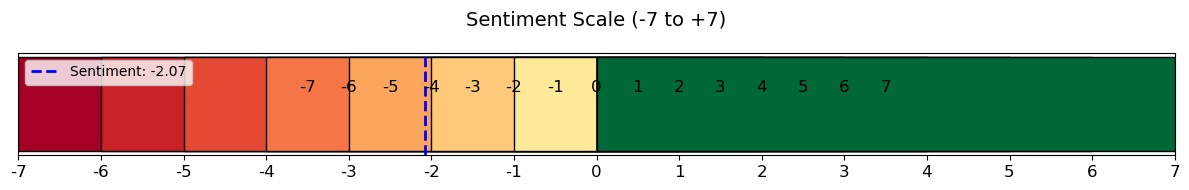

Please enter the tweet content (or type 'EXIT' to quit):  This is not Hiroshima, this is Gaza.  Gaza is nearly 3 times smaller than Hiroshima, and Israel has dropped the equivalent of 6 ATOMIC BOMBS on Gaza.  Don't stop talking about Gaza as if your life depends on it, because their lives depend on it!


Sentiment Score (scaled -7 to 7): -2.07
Sentiment Category: Negative
Details: {'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compound': -0.296}


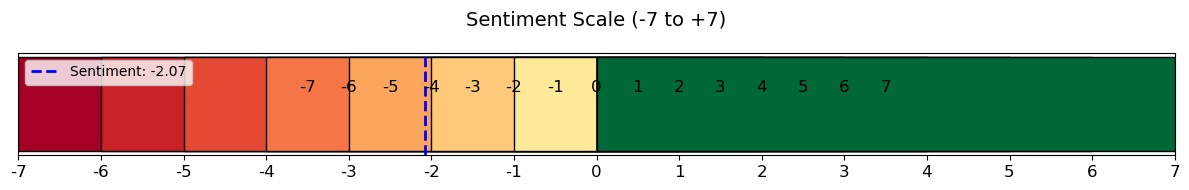

Please enter the tweet content (or type 'EXIT' to quit):  This is not Hiroshima, this is Gaza.  Gaza is nearly 3 times smaller than Hiroshima, and Israel has dropped the equivalent of 6 ATOMIC BOMBS on Gaza.  Don't stop talking about Gaza as if your life depends on it, because their lives depend on it!


Sentiment Score (scaled -7 to 7): -2.07
Sentiment Category: Negative
Details: {'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compound': -0.296}


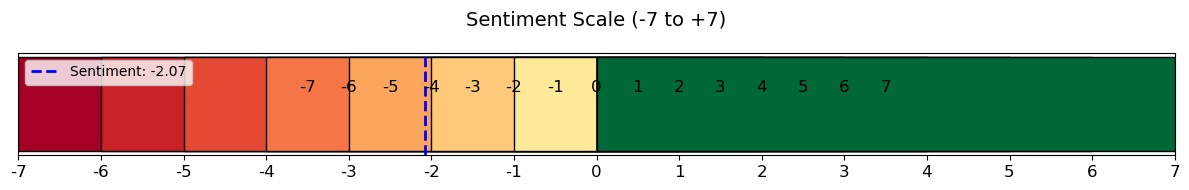

KeyboardInterrupt: Interrupted by user

In [27]:
import re
import pandas as pd
import snscrape.modules.twitter as sntwitter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

nltk.download('vader_lexicon')

# Function to clean tweet content
def clean_tweet_content(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtag symbol
    tweet = re.sub(r'\W+', ' ', tweet)  # Remove non-word characters
    return tweet

# Function to perform sentiment analysis and scale to -7 to 7
def analyze_sentiment(tweet_text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(tweet_text)
    
    # Scale the compound score to -7 to 7
    sentiment_score = sentiment['compound'] * 7
    return sentiment_score, sentiment

# Function to categorize sentiment
def categorize_sentiment(score):
    if score <= -5:
        return "Highly Negative"
    elif score <= -2:
        return "Negative"
    elif score < 0:
        return "Slightly Negative"
    elif score == 0:
        return "Neutral"
    elif score < 2:
        return "Slightly Positive"
    elif score < 5:
        return "Positive"
    else:
        return "Highly Positive"

# Function to plot the sentiment score on the scale
def plot_sentiment_scale(sentiment_score):
    # Define the scale values and labels
    scale_values = np.arange(-7, 8, 1)
    labels = [str(i) for i in scale_values]

    # Create a colormap that transitions from red (negative) to green (positive)
    colors = plt.cm.RdYlGn((scale_values + 7) / 14)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 2))
    bars = ax.barh(0, scale_values, color=colors, edgecolor='black', height=1)

    # Add labels above each bar
    for bar, label in zip(bars, labels):
        ax.text(bar.get_x() + bar.get_width() / 2, 0.1, label, ha='center', va='bottom', fontsize=12)

    # Add vertical line for the sentiment score
    ax.axvline(x=sentiment_score, color='blue', linestyle='--', linewidth=2, label=f'Sentiment: {sentiment_score:.2f}')

    # Remove y-axis and customize x-axis
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks(scale_values)
    ax.set_xlim(-7, 7)
    ax.set_xticks(scale_values)
    ax.set_xticklabels(labels, fontsize=12)

    # Title and layout adjustments
    plt.title('Sentiment Scale', fontsize=14, pad=20)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Function to get tweet content from user
def get_tweet_content_from_user():
    tweet_text = input("Please enter the tweet content (or type 'EXIT' to quit): ")
    return tweet_text

# Main function to run the program
def run_sentiment_analysis():
    while True:
        # Get input from user
        tweet_text = get_tweet_content_from_user()
        
        if tweet_text.lower() == 'exit':
            print("Exiting the program.")
            break
        
        # Clean the tweet content
        clean_text = clean_tweet_content(tweet_text)
        
        # Analyze sentiment
        sentiment_score, sentiment = analyze_sentiment(clean_text)
        
        # Categorize sentiment
        sentiment_category = categorize_sentiment(sentiment_score)
        
        # Display sentiment score and category
        print(f"Sentiment Score (scaled -7 to 7): {sentiment_score:.2f}")
        print(f"Sentiment Category: {sentiment_category}")
        print(f"Details: {sentiment}")
        
        # Plot the sentiment score on the scale
        plot_sentiment_scale(sentiment_score)

if __name__ == "__main__":
    run_sentiment_analysis()
